# Machine Learning UD1 Homework

### Rubén Gavilán Olaya

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's first create datasets for the three different distributions to be used:

In [2]:
n=200000 # Population size

X_gauss=np.zeros(n)
X_gauss_2=np.zeros(n)
X_uniform=np.zeros(n)
X_beta=np.zeros(n)

for i in range(n):
    X_gauss[i]=np.random.normal(1.3,0.45)
    X_gauss_2[i]=np.random.normal(-0.5,2.5)
    X_uniform[i]=np.random.uniform(0,1)
    X_beta[i]=np.random.beta(1.77,3)

mean_uniform=(1/n)*np.sum(X_uniform)
mean_beta=(1/n)*np.sum(X_beta)
mean_gauss=(1/n)*np.sum(X_gauss)
mean_gauss_2=(1/n)*np.sum(X_gauss_2)

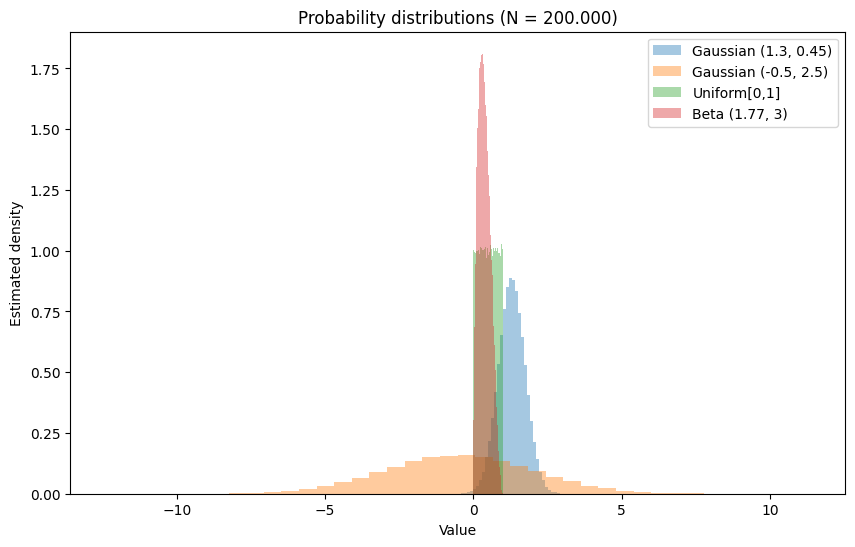

In [3]:
plt.figure(figsize=(10, 6))
    # Plot histogram for N=200000 samples (density normalized and semi-transparent)
plt.hist(X_gauss, bins=40, alpha=0.4, density=True, label="Gaussian (1.3, 0.45)")
plt.hist(X_gauss_2, bins=40, alpha=0.4, density=True, label="Gaussian (-0.5, 2.5)")
plt.hist(X_uniform, bins=40, alpha=0.4, density=True, label="Uniform[0,1]")
plt.hist(X_beta, bins=40, alpha=0.4, density=True, label="Beta (1.77, 3)")
#plt.legend()
plt.title("Probability distributions (N = 200.000)")
plt.xlabel("Value")
plt.ylabel("Estimated density")
plt.legend()
plt.show()

### Exercise 1: 

#### Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

Let's write the mathematical expression of Hoeffding's inequality:
\begin{equation}
P(|\overline{X} - \mathbb{E}[\overline{X}]| \geq \epsilon) \leq 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}}
\end{equation}


We are going to use Hoeffding's inequality to estimate the confidence interval of the beta distribution and the uniform distribution, since these are the ones confined in $\left[0,1\right]$.
From the confidence interval definition, we know: \begin{equation}
P(\theta \in [\hat{\theta}_l, \hat{\theta}_h]) \geq 1-\alpha
\end{equation}
Where $1-\alpha$ is the confidence level. We can rewrite that expression:
\begin{equation}
P(\theta \notin [\hat{\theta}_l, \hat{\theta}_h]) = \alpha
\end{equation}
Now using Hoeffding's inequality, we can express:
\begin{equation}
\alpha = 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^n(a_i - b_i)^2}} \Rightarrow \left\{ \sum_{i=1}^{n}(a_i - b_i)^2 = \sum_{i=1}^{n} 1 = n \right\} \Rightarrow\log\left(\frac{\alpha}{2}\right) = -2n \epsilon^2 \Rightarrow \epsilon = \sqrt{-\frac{\log(\alpha /2)}{2n}}
\end{equation}

We will use the common value of $\alpha = 0.05$

In [4]:
alpha=0.05
epsilon_hoeff=np.sqrt(-(np.log(0.5*alpha))/(2*n))
#print(epsilon_hoeff)
uniform_hoeff_interval=np.float64([mean_uniform - epsilon_hoeff, mean_uniform + epsilon_hoeff])
beta_hoeff_interval=np.float64([mean_beta - epsilon_hoeff, mean_beta + epsilon_hoeff])
print(uniform_hoeff_interval)
print(beta_hoeff_interval)

[0.49712169 0.5031953 ]
[0.36774856 0.37382217]


Now we estimate the confidence interval using Chebyshev's inequality. This inequality can be expressed as:
\begin{equation}
P(|X-\mathbb{E}[X]| \geq \lambda) \leq \frac{Var(X)}{\lambda^2}
\end{equation}
Using the empirical mean, we obtain:
\begin{equation}
P(|\bar{X}-\mathbb{E}[\bar{X}]| \geq \lambda) \leq \frac{Var(X)}{N\lambda^2}
\end{equation}
Using similar arguments from Hoeffding's inequality we reach:
\begin{equation}
\alpha = \frac{Var(X)}{N \lambda^2} \Rightarrow \lambda= \epsilon = \sqrt{\frac{Var(X)}{N \alpha}}
\end{equation}

We need to calculate the variance of the different probability distribution. 
We know the variance of the gaussian distribution since we know the standard deviation $\sigma$ and $Var(X)=\sigma^2$.

To calculate the variance of the uniform distribution we can use the following expression: $Var(X)=\frac{(b-a)^2}{12}=\frac{1}{12}\approx 0.083$

To calculate the variance of the beta distribution we can use: $Var(X)=\frac{\alpha\beta}{(\alpha + \beta + 1)(\alpha + \beta)^2}\approx 0.040$

In [5]:
var_gauss=0.45**2
var_gauss_2=2.5**2
var_uniform=1/12
var_beta=(1.77*3)/((1.77 + 3 + 1)*(1.77 + 3)**2)

eps_cheb_gauss = np.sqrt(var_gauss/(n*alpha))
eps_cheb_gauss_2 = np.sqrt(var_gauss_2/(n*alpha))
eps_cheb_uniform = np.sqrt(var_uniform/(n*alpha))
eps_cheb_beta = np.sqrt(var_beta/(n*alpha))

gauss_cheb_interval= np.float64([1.3 - eps_cheb_gauss, 1.3 + eps_cheb_gauss])
gauss_cheb_interval_2= np.float64([-0.5 - eps_cheb_gauss_2, -0.5 + eps_cheb_gauss_2])
uniform_cheb_interval= np.float64([mean_uniform - eps_cheb_uniform, mean_uniform + eps_cheb_uniform])
beta_cheb_interval= np.float64([mean_beta - eps_cheb_beta, mean_beta + eps_cheb_beta])
print(gauss_cheb_interval)
print(gauss_cheb_interval_2)
print(uniform_cheb_interval)
print(beta_cheb_interval)

[1.2955 1.3045]
[-0.525 -0.475]
[0.49727174 0.50304524]
[0.36877423 0.3727965 ]


### Exercise 2: 

#### When possible, compare your results to theoretical values.

The closest to a "Theoretical value" of the confidence interval is the 68-95-99.7 rule applied to the normal distribution, let's compare our previous estimation to this rule:

This rule tells us that a confidence interval of 2$\frac{\sigma}{\sqrt N}$ has a confidence level of $\approx 95\%$ which is the same confidence level we have been using in this work. 

In [6]:
gauss_rule_interval=np.float64([1.3 - 2*0.45/np.sqrt(n) , 1.3 + 2*0.45/np.sqrt(n)])
gauss_2_rule_interval=np.float64([-0.5 - 2*2.5/np.sqrt(n) , -0.5 + 2*2.5/np.sqrt(n)])
print(gauss_rule_interval)
print(gauss_2_rule_interval)

[1.29798754 1.30201246]
[-0.51118034 -0.48881966]


We can observe that, even though both intervals are similar, the interval calculated by the $2\sigma$ rule is narrower. This is consistent with the fact that Chebyshev's inequality allows only an estimation of the confidence interval.

### Exercise 3:

#### For which distributions does the 68–95–99.7 rule hold?

Let's now try to apply this rule to the data from both the uniform and beta distribution.

The 68-95-99.7 rule state that $68\%$ of the data is inside the interval $[\mu-\sigma, \mu+\sigma]$; $95.45\%$ of the data is inside the interval $[\mu-2\sigma, \mu+2\sigma]$ and $99.7\%$ of the data is inside the interval $[\mu-3\sigma, \mu+3\sigma]$. 

In [7]:
def rule (X,mu,sigma):
    return {
        "68%": np.float64(np.mean(np.abs(X-mu) <= sigma)),
        "95%": np.float64(np.mean(np.abs(X-mu) <= 2 * sigma)),
        "99.7%": np.float64(np.mean(np.abs(X-mu) <= 3 * sigma))
    }
uniform_rule=rule(X_uniform,mean_uniform,np.sqrt(var_uniform))
beta_rule=rule(X_beta,mean_beta,np.sqrt(var_beta))

print(uniform_rule)
print(beta_rule)

{'68%': np.float64(0.578475), '95%': np.float64(1.0), '99.7%': np.float64(1.0)}
{'68%': np.float64(0.64062), '95%': np.float64(0.969065), '99.7%': np.float64(0.999925)}


We can observe that the 68-95-99.7 rule does not work on the uniform distribution, and even $2\sigma$ covers up the entire domain of the distribution, resulting in a $100\%$ of the data being inside the interval.
On the other hand, although it's not as accurate, this rule works on our beta distribution as an estimation. The precision of the rule with the beta distribution depends on $\alpha$ and $\beta$, parameters of the distribution, and thus, the 68-95-99.7 rule does not apply in general to the distribution.